# Quadrature 

You may frequently find yourself in a situation where you need to do one of two things:

1. Solve a definite integral for which the analytical solution is either impossible or sufficiently tedious, difficult, and error prone that it may as well be impossible. This is a good application for numerical integration using something like gaussian quadrature.
2. Integrate discrete data points; this is typically done using quadrature methods like the trapezoidal rule or Simpson's rule.

These are built into most programming languages, and we should at least know how to use them when we need them. When you solve a definite integral on your calculator, they are using some version of quadrature methods. We'll keep this exercise pretty brief.

## Gaussian Quadrature

Let's say we want to solve the following definite integral:

$$A = \int_0^{10} x^2 dx$$

Analytically, we know that the solution is:

$$\frac{x^3}{3} \bigg|_0^{10} = \frac{10^3}{3} - \frac{0^3}{3} = 333.33$$

We can also integrate this using gaussian quadrature, which provides a numerical approximation. We will not go into detail about how gaussian quadrature works, but if you're interested, it is basically done by calculating the function value at very specific locations of the independent variable, multiplying those values by very specific weight factors, and summing up all of the results:

https://en.wikipedia.org/wiki/Gaussian_quadrature

In Python, easy gaussian quadrature is available in Scipy, specifically, scipy.integrate.quadrature:

```python
from scipy import integrate
```

Read more about it here:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html

In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

### Defining the integrand for use with `integrate.quadrature()`

The basic usage is that we first define the integrand as a function (the integrand is just what we are going to integrate). 

```python
def integrand(x):
    return x**2
```

In [2]:
def integrand(x):
    return x**2

### Solving the definite integral using `integrate.quadrature()`

Then we can integrate directly with quadgk, which the basic syntax:

```python
integral, error = integrate.quadrature(function, lower limit, upper limit)
```

It returns both the value of the integral and the error associated with the numerical integration. For this example:

```python
int_val, err_val = integrate.quadrature(integrand, 0, 10)
```

In [4]:
int_val, err_val = integrate.quadrature(integrand, 0, 10)
print(int_val, err_val)

333.33333333333326 1.1368683772161603e-13


## Integrating discrete data: Trapezoidal and Simpson's

Simpson's rule and the trapezoidal rule work for discrete sets of data that we need to integrate.  So, for example, if I just calculated some discrete values of $y = x^2$ on the domain $x = [0,10]$:

```python
x = np.linspace(0, 10, 15)
y = x**2    
plt.scatter(x,y)
```

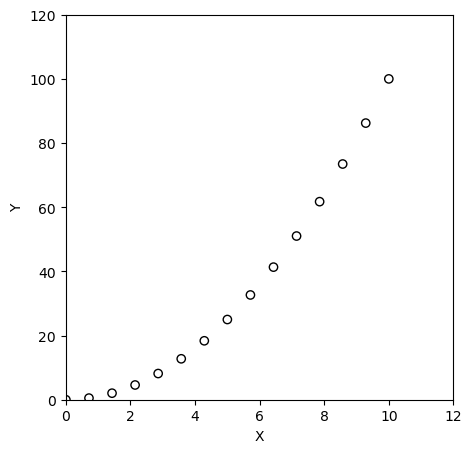

In [13]:
x = np.linspace(0, 10, 15)
y = x**2    
plt.figure(1, figsize = (5, 5))
plt.scatter(x, y, marker = 'o', color = 'none', edgecolor = 'black')
plt.xlim(0, 12)
plt.ylim(0, 120)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

So let's pretend we don't know that data was generated using the function $y = x^2$, and we just wanted to integrate it based on the discrete values of x and y that we have in our data set.  We would use either the trapezoidal rule or Simpson's rule.  Simpson's and Trapezoidal rules are both available in Python through the Scipy package.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapezoid.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html

### Trapezoidal Rule

If I wanted to calculate an approximate integral using the trapezoidal rule, would do so as follows:

```python
integrate.trapezoid(y, x)
```
    
This will return the approximate integrated area of y(x)dx over the domain of x that we've sampled.

In [14]:
integrate.trapezoid(y, x)

334.1836734693877

### Simpson's Rule

Alternatively, the analogous integration using Simpson's rule:

```python
integrate.simpson(y, x) 
```

In [15]:
integrate.simpson(y, x) 

333.33333333333337

### Cumulative integration with the trapezoidal rule

Finally, we commonly need to know the cumulative value of the integral at each value of the independent variable. This is very common in working with probability or residence time distributions. We can get this using the following syntax, which will only use a trazezoidal rule:

```python
ctrapz = integrate.cumulative_trapezoid(y, x)
plt.plot(x[1:], ctrapz)
```
    
You'll see that this generates an array of integral values.  Basically, it keeps a running tab of the integrated area as you move through the set.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html

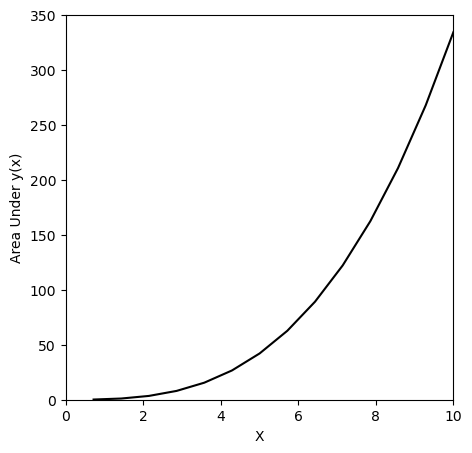

In [25]:
ctrapz = integrate.cumulative_trapezoid(y, x)

plt.figure(1, figsize = (5, 5))
plt.plot(x[1:], ctrapz, color = 'black')
plt.xlim(0, 10)
plt.ylim(0, 350)
plt.xlabel('X')
plt.ylabel('Area Under y(x)')
plt.show()
